## Descending Into Neural Networks

Over the next three weeks, I will be slowly introducing us to the internal mechanics of neural networks. Each week there will be a few lessons leading toward a deeper understanding of this topic. I will try to connect them to other material that we will be studying, but the primary purpose is to gradually learn this very complicated topic. 

# Review Linear Regression and Conceptualizing the Gradient Descent

In [1]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

### Prepare some noisy sample data and plot it

We are looking to create a dummy dataset to play with. We want it to be linear but noisy. Our underlying equation is

$$f(x) = \beta_1x+\beta_0 + \epsilon$$

Where $\beta_1$ and $\beta_0$ are set values but $\epsilon$ is randomly generated noise. 

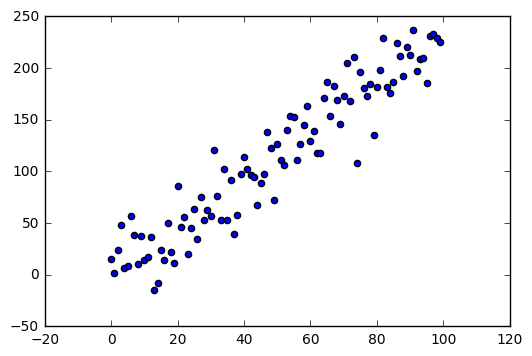

In [2]:
indep = np.arange(100)

np.random.seed(42)

# underlying values
beta_0 = 3.3
beta_1 = 2.3

# noise factor 
gamma = 25 

linear_function = lambda x: beta_1*x + beta_0

# from a univariate “normal” (Gaussian) distribution of mean 0 and variance 1
noise = gamma*np.random.randn(100) 

noisy_data = linear_function(indep) + noise
plt.scatter(indep, noisy_data)

## Making Predictions

Looking at the data, it seems pretty clear that there is a linear trend (pretend you don't know that there is). 


In order to make predictions on new data, we might propose that we use a linear model

$$\hat{f}(x) = \hat{\beta}_1x+\hat{\beta}_0$$

where $\hat{\beta}_1$ and $\hat{\beta}_0$ represent our estimates of the actual parameters in the underlying linear function.

In [3]:
prediction_function = lambda beta_1, beta_0, x: beta_1*x + beta_0

We can use this `predict` function to try to fit a model to our data. 

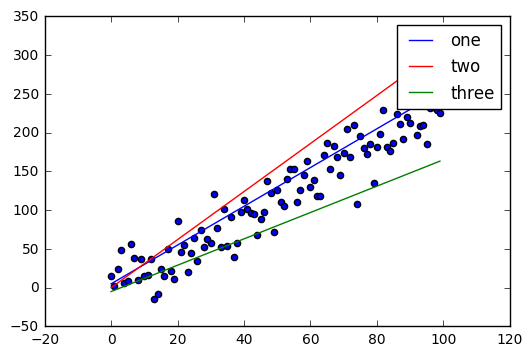

In [4]:
predictions_1 = [prediction_function(2.5,  5, x_i) for x_i in indep]
predictions_2 = [prediction_function(3.1,  0, x_i) for x_i in indep]
predictions_3 = [prediction_function(1.7, -5, x_i) for x_i in indep]
plt.scatter(indep, noisy_data)
plt.plot(indep, predictions_1, c='b', label='one')
plt.plot(indep, predictions_2, c='r', label='two')
plt.plot(indep, predictions_3, c='g', label='three')
plt.legend()

In [5]:
noisy_data[:10], indep[:10]

(array([ 15.71785383,   2.14339247,  24.09221345,  48.27574641,
          6.64616563,   8.94657608,  56.58032039,  38.58586823,
          9.96314035,  37.56400109]), array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]))

## Estimating the Underlying Function

Because we know the actual values, we can also measure the error associated with a given $(x_i,y_i)$

$$\text{error}(x_i, y_i) = y_i - \hat{f}(x_i)$$

In [6]:
error = lambda beta_1, beta_0, x_i, y_i: \
                    y_i - prediction_function(beta_1, beta_0, x_i)

At this point, we have

1. a prediction function
   - $\hat{f}(x) = \hat{\beta}_1x+\hat{\beta}_0$
   - `prediction_function = lambda beta_1, beta_0, x: beta_1*x + beta_0`
1. a weigh to measure the error for a single value in our prediction function
   - $\text{error}(x_i, y_i) = y_i - \hat{f}(x_i)$
   - `error = lambda beta_1, beta_0, x_i, y_i: y_i - prediction_function(beta_1, beta_0, x_i)`

## Optimizing i.e. Finding the Best Prediction Function

To find the best Prediction Function we will need to know:

- the error over our entire data set. 
    - ignoring the sign of our error
    - weighing outliers more heavily

We can do this with the sum of the squared errors.

In [7]:
zip(indep, noisy_data)[:5]

[(0, 15.717853825280816),
 (1, 2.1433924707203831),
 (2, 24.09221345251731),
 (3, 48.27574641020064),
 (4, 6.6461656319166007)]

In [8]:
def sum_of_squared_errors(beta_hat_1, beta_hat_0, x, y):
    errors = [error(beta_hat_1, beta_hat_0, x_i, y_i)
              for x_i, y_i in zip(x, y)]
    squared_errors = [err**2 for err in errors]
    return sum(squared_errors)

In [9]:
print sum_of_squared_errors(2.5,  5, indep, noisy_data)
print sum_of_squared_errors(3.1,  0, indep, noisy_data)
print sum_of_squared_errors(1.7, -5, indep, noisy_data)

73357.8080415
251008.052937
209855.605064


We can see that the blue line from above is the best.

### Try a few more

In [10]:
print sum_of_squared_errors(2.5,  5, indep, noisy_data)
print sum_of_squared_errors(2.3,  4, indep, noisy_data)
print sum_of_squared_errors(2.1,  3, indep, noisy_data)
print sum_of_squared_errors(1.9,  2, indep, noisy_data)
print sum_of_squared_errors(1.7,  1, indep, noisy_data)
print sum_of_squared_errors(1.5,  0, indep, noisy_data)

73357.8080415
52119.1061777
61308.4043139
100925.70245
170971.000586
271444.298722


#### `np.arange`

In [11]:
np.arange(2.3,2.4,.01)

array([ 2.3 ,  2.31,  2.32,  2.33,  2.34,  2.35,  2.36,  2.37,  2.38,
        2.39,  2.4 ])

### Find SSE over two `np.arange`, one for each $\beta$

In [48]:
assert False

AssertionError: 

In [49]:
len(np.arange(-5,5, 0.5)) == len(np.arange(2.2, 2.4, 0.01))

True

In [50]:
assert len(np.arange(-5,5, 0.5)) == len(np.arange(2.2, 2.4, 0.01))

63796.7782565
61559.3030138
59536.4977712
57728.3625285
56134.8972858
54756.1020432
53591.9768005
52642.5215578
51907.7363151
51387.6210725
51082.1758298
50991.4005871
51115.2953444
51453.8601018
52007.0948591
52774.9996164
53757.5743738
54954.8191311
56366.7338884
57993.3186457


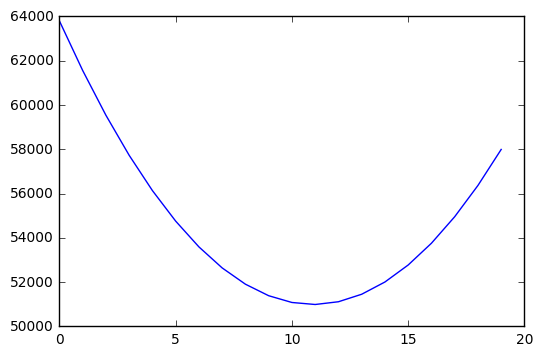

In [13]:
SSEs = []
beta_ones = np.arange(2.2, 2.4, 0.01)
beta_zeros = np.arange(-5,5, 0.5)
for beta_hat_1, beta_hat_0 in zip(beta_ones, beta_zeros):
    SSE = sum_of_squared_errors(beta_hat_1,
                                beta_hat_0, 
                                indep, 
                                noisy_data)
    print SSE
    SSEs.append(SSE)

plt.plot(SSEs)    

#### Find the optimal value from the plot

In [15]:
zip(zip(beta_ones, beta_zeros)[7:15], SSEs[7:15])

[((2.2699999999999987, -1.5), 52642.521557812215),
 ((2.2799999999999985, -1.0), 51907.736315139417),
 ((2.2899999999999983, -0.5), 51387.621072466551),
 ((2.299999999999998, 0.0), 51082.175829793734),
 ((2.3099999999999978, 0.5), 50991.400587120908),
 ((2.3199999999999976, 1.0), 51115.295344448066),
 ((2.3299999999999974, 1.5), 51453.860101775208),
 ((2.3399999999999972, 2.0), 52007.094859102384)]

#### Assign this to the value `beta_hat`

In [16]:
beta_hat = zip(beta_ones, beta_zeros)[11]

In [17]:
beta_hat

(2.3099999999999978, 0.5)

(-1, 40)

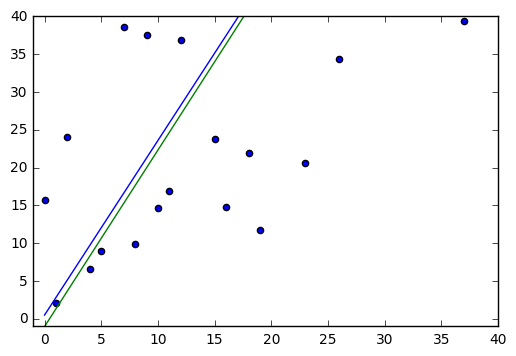

In [23]:
predictions = [prediction_function(beta_hat[0], beta_hat[1], x_i) 
               for x_i in indep]
best_fit_predictions = [
    prediction_function(2.33483148, -1.02032135, x_i)
    for x_i in indep
]
plt.scatter(indep, noisy_data)
plt.plot(indep, predictions)
plt.plot(indep, best_fit_predictions)
plt.xlim(-1,40)
plt.ylim(-1,40)

### Matrix Wizardy to find the Actual Best Fit

In [20]:
from numpy.linalg import inv
X = np.array([indep, np.ones(len(indep))]).T
inv(X.T.dot(X)).dot(X.T).dot(noisy_data)

array([ 2.33483148, -1.02032135])

This is most likely not what we found.

### Examine the SSEs

In [27]:
beta_hat = (beta_hat[1], beta_hat[0])
sum_of_squared_errors(beta_hat[1], beta_hat[0],
                      indep, 
                      noisy_data)

50991.400587120908

In [25]:
sum_of_squared_errors(2.33483148, -1.02032135,
                      indep, 
                      noisy_data)

50931.544593629907

## What happened?


We clearly have not found the optimal value.

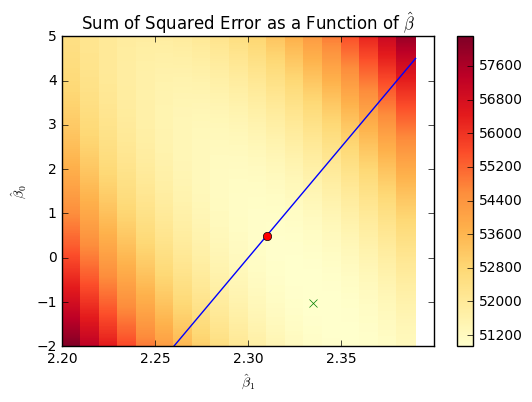

In [36]:
beta_hat_1s = np.arange(2.2,2.4,.01)
beta_hat_0s = np.arange(-2,5,.01)
SSEs = [[sum_of_squared_errors(beta_hat_1_i, beta_hat_0_i, indep, noisy_data) 
         for beta_hat_1_i in beta_hat_1s] 
        for beta_hat_0_i in beta_hat_0s]
plt.pcolormesh(beta_hat_1s, beta_hat_0s, SSEs, cmap='YlOrRd')
plt.colorbar() #need a colorbar to show the intensity scale
plt.title('Sum of Squared Error as a Function of $\hat\\beta$')
plt.xlabel('$\hat{\\beta}_1$')
plt.ylabel('$\hat{\\beta}_0$')

# Plot the path over which we searched for the best
plt.plot(beta_ones, beta_zeros)
plt.xlim(2.2,2.4)
plt.ylim(-2,5)
plt.plot(2.33483148, -1.02032135, 'x')
plt.plot(beta_hat[1], beta_hat[0], 'o')

### WE MISSED IT!!!

### 3D Look at SSE Plot

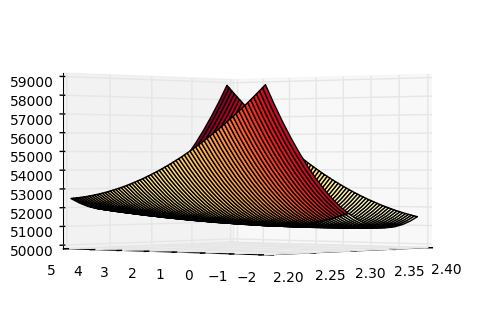

In [34]:
from mpl_toolkits.mplot3d import axes3d


# ax.plot_wireframe(beta_hat_1s, beta_hat_0s, SSEs, rstride=10, cstride=10)


fig = plt.figure()
ax = fig.gca(projection='3d')

B_1, B_0 = np.meshgrid(beta_hat_1s, beta_hat_0s)
Z = sum_of_squared_errors(B_1, B_0, indep, noisy_data)

surf = ax.plot_surface(B_1, B_0, Z, rstride=10, cstride=10, cmap='YlOrRd')
ax.view_init(0, 220)


### Manually Finding the Optimal Value

(-2, 5)

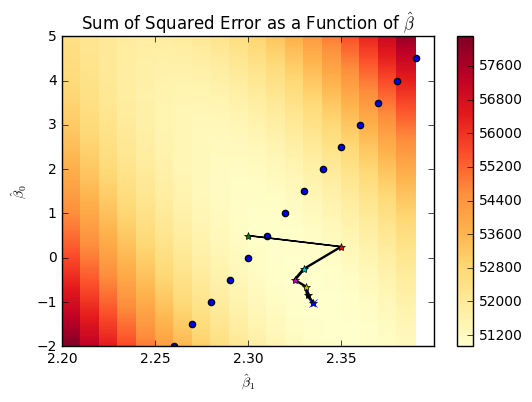

In [73]:
beta_hat_1s = np.arange(2.2,2.4,.01)
beta_hat_0s = np.arange(-2,5,.01)
SSEs = [[sum_of_squared_errors(beta_hat_1_i, beta_hat_0_i, indep, noisy_data) 
         for beta_hat_1_i in beta_hat_1s] 
        for beta_hat_0_i in beta_hat_0s]
plt.pcolormesh(beta_hat_1s, beta_hat_0s, SSEs, cmap='YlOrRd')
plt.colorbar() #need a colorbar to show the intensity scale
plt.title('Sum of Squared Error as a Function of $\hat\\beta$')
plt.xlabel('$\hat{\\beta}_1$')
plt.ylabel('$\hat{\\beta}_0$')
plt.scatter(beta_ones, beta_zeros)
plt.plot(2.33483148, -1.02032135, 'x')
points = [
    (2.30, 0.5),
    (2.35, 0.25),
    (2.33, -0.25),
    (2.325, -0.5),
    (2.331, -0.65),
    (2.332, -0.85),
    (2.33483148, -1.02032135)
]
for i, point in enumerate(points):
    plt.plot(point[0],point[1], '*')
    if i > 0:
        dx, dy = point[0] - last_point[0], point[1] - last_point[1]
        plt.arrow(last_point[0], last_point[1], dx, dy, head_width=0.0001)
    last_point = point


plt.xlim(2.2,2.4)
plt.ylim(-2,5)

In [69]:
(1,0)-(0,1)

TypeError: unsupported operand type(s) for -: 'tuple' and 'tuple'

In [65]:
p.contains()

TypeError: contains() takes exactly 2 arguments (1 given)